**Mansoor Nabawi 309498**

# **Exercise 1**


### **Matrix Multiplication**


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import requests
import re

import matplotlib.pyplot as plt
import seaborn as sns


Matrix multiplication 

In [2]:
# shape
n, m = 100, 20
#fixed seed
np.random.seed(1)
#Matrix A
A = np.random.random(size = (n,m))

#Matrix V
v = np.random.normal(loc=2, scale=0.01, size=(m,1))

#an ampty column wise-vector for final summation
c = np.empty(shape = (n,1))

#using elementwise multiplication
#A[0,:]@v
#elementwise multiplication
for i in range(A.shape[0]):
  sum = 0
  #each row
  vec_a = A[i,:]
  #summation 
  for j in range(m):
    sum += vec_a[j]*v[j]
  c[i] = sum

Mean

In [3]:
print("mean is:",c.mean())

mean is: 20.357558535112943


In [4]:
total = 0
for i in range(len(c)):
  total += c[i]

print("mean is: ", float(total/len(c)))

mean is:  20.357558535112947


Standard Deviation

In [5]:
c.std()

2.4392398892052234

In [6]:
#https://stackabuse.com/calculating-variance-and-standard-deviation-in-python/

import math

def variance(data, ddof=0):
     n = len(data)
     mean = np.sum(data) / n
     return np.sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
     var = variance(data)
     std_dev = math.sqrt(var)
     return std_dev

In [7]:
stdev(c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


2.4392398892052225

**Plotting**

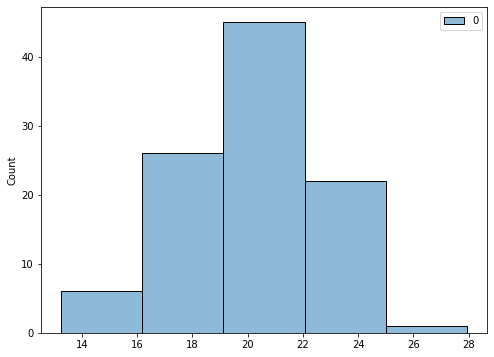

In [8]:
#plt.hist(c, bins=5)
plt.figure(figsize=(8,6))
sns.histplot(c, bins=5)
plt.show()

**REPORT**

---




> For ***Matrix multiplication***

1.   First we initialize m, n as they are the shape of our matrix. 
2.   Then we choose a fixed seed to always output the same random values.
3. Creating the Matrix A and V using the numbers given.
4. Creating an empty matrix C, to sum all the numbers at the end
5. To make the matrix c:
    1.   First take each row and mutiply each element in it with each element in vector V and sum them at last.
    2.   Put the value driven from previous step to vector c and continue for the next row.
  
6. To get the mean of Vector C, we just divide the sum of c over the length(number of element of c).
7. To get the standard deviation, we first compute the variance and then compute the standard deviation which is the square root of variance.
8. At final we use either seaborn or matplotlib to plot the histogram of vector c using 5 bins.

---















### Grading Program


In [9]:
#loading the dataset
grades_df = pd.read_csv('Grades.csv')
#fixing column names
grades_df.columns = ['First_Name', 'Last_Name', 'English', 'Maths', 'Science', 'German','Sports', 'Final_Grade']

In [10]:
#an overall look
grades_df.describe()

,English,Maths,Science,German,Sports,Final_Grade
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,75.694667,71.656000,71.404000,59.626000,64.253667,342.634333
std,27.515092,31.742766,31.634167,40.086748,40.318332,85.124911
min,0.840000,-0.100000,-14.870000,-56.740000,-36.810000,184.000000
25%,56.562500,57.182500,53.162500,34.110000,44.140000,272.067500
50%,83.580000,75.365000,81.430000,70.200000,78.360000,363.195000
75%,100.000000,100.000000,100.000000,99.880000,100.000000,404.197500
max,100.000000,100.000000,100.000000,100.000000,100.000000,475.810000


In [11]:
#Making an extra column to work with dataframe easier
grades_df["Full_name"] = grades_df["First_Name"] +" "+ grades_df["Last_Name"]
#dropping the two columns we concatenated before and don't need them
grades_df.drop(columns = ["First_Name","Last_Name"], inplace=True)

* doing for each student



In [12]:
#getting the sum of the 5 subjects over the axis=1 (columns)
grades_df["sum_all_subjects"] = grades_df[['English', 'Maths', 'Science', 'German','Sports']].sum(axis=1).reset_index(drop=True)
#getting average of the 5 subjects over the axis=1 (columns)
grades_df["average"] = np.ceil(grades_df[['English', 'Maths', 'Science', 'German','Sports']].mean(axis=1))
#getting the standard deviation of the 5 subjects over the axis=1 (columns)
grades_df["standard_deviation"]=grades_df[['English', 'Maths', 'Science', 'German','Sports']].std(axis=1)
#sorting values by grades, better grades stands first
grades_df.sort_values(by="average", ascending=False, inplace=True)

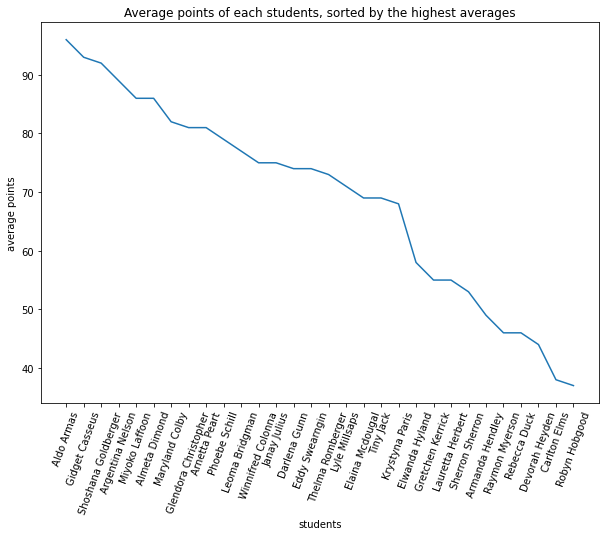

In [13]:
#plotting
plt.figure(figsize=(10,7))
plt.plot(grades_df.Full_name,grades_df.average)
plt.title("Average points of each students, sorted by the highest averages")
plt.ylabel("average points")
plt.xlabel("students")
plt.xticks(rotation=70)
plt.show()

In [14]:
#creating categorical column for grades
grades_df["grades"] = grades_df.average.apply(lambda x: "A+" if (x<=100 and x>=96) else ("A" if (x<=95 and x>=90) else ("A-" if (x<=89 and x>=86) else("B+" if (x<=85 and x>=80) else("B" if (x<=79 and x>=76) else("B-" if (x<=75 and x>=70) else("C+" if (x<=69 and x>=66) else("C" if (x<=65 and x>=60) else("D" if (x<=59 and x>=56) else("F"))))))))))

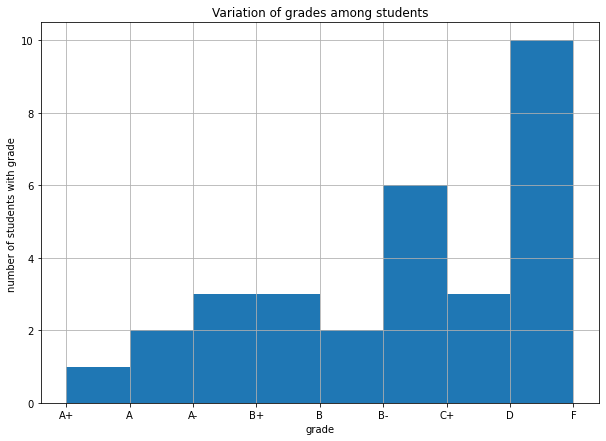

In [15]:
#plotting
plt.figure(figsize=(10,7))
grades_df.grades.hist(bins=8)
plt.title("Variation of grades among students")
plt.ylabel("number of students with grade ")
plt.xlabel("grade")
plt.show()

---

**REPORT**
To make this grading program works we did:

1. Fixed column names.
2. Making one column out of first name and last name column to make it easier to work with and dropped the two unnecessary column.
3. to compute the sum for all subjects for each students we used ***sum*** method but using *axis=1* which summs overl 5 columns of the subjects.
4. to compute the average we used ***mean*** mthod like previous step in *axis=1* which computes the average over the 5 columns we chose we used np.ceil to get the higher number if it had fractions.
5. we continue the same procedure for this step and use ***std*** method over chosen columns and *axis=1*.
6. to plot we first sort values by higher grades to see a better understanding of the students performance.
7. to make the grade column we used apply function and inside of it a lambda function which checks each grade and choos an appropriate grade for it. (many if-else used here, i believe there is a better approach but this came to my mind first).
8. using the grades calculated in the previous step we plot a histogram using 8 bins (as of the grades).



---



---



---





# Exercise 2


### Linear Regression

In [16]:
#generating data samples
n, m = 100, 2
mui, sigma = 2, [0.01,0.1,1]
#3 data samples
A_1 = np.random.normal(loc = mui, scale = sigma[0], size=(n,m))
A_2 = np.random.normal(loc = mui, scale = sigma[1], size=(n,m))
A_3 = np.random.normal(loc = mui, scale = sigma[2], size=(n,m))

A = np.concatenate((A_1, A_2, A_3), axis=0)

In [17]:
A.shape

(300, 2)

In [18]:
sigma[0]

0.01

### LEARN-SIMPLE-LINREG algorithm

In [19]:
def learn_simple_linreg_algo(x, y):
  """
  a function to learn a simple linear regression.
  """
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  beta_1 = np.sum((x-x_mean) * (y-y_mean)) / np.sum((x-x_mean)**2)
  beta_0 = y_mean - beta_1*x_mean

  return beta_0, beta_1

In [20]:
def predict_simple_linreg(x, beta_0, beta_1):
  """
  a function to predict new values using the learned beta0 and beta1 from a linear regression algorithm.
  """
  y_hat = beta_0 + beta_1 * x
  return y_hat

In [21]:
#predictor
X = A[:,0]
#target
y = A[:,1]

In [22]:
#learning beta values
b_0, b_1 = learn_simple_linreg_algo(x = X, y=  y)

In [23]:
#beta values
b_0, b_1

(2.1528026315046525, -0.07590822241757832)

In [24]:
#making prediction
y_pred = predict_simple_linreg(X, b_0, b_1)

In [25]:
#first 10 predicted values
y_pred[:10]

array([2.00145773, 2.00026203, 2.00010796, 2.00218104, 2.00209367,
       2.00226196, 2.00184949, 1.99998804, 2.00076529, 2.00151588])

In [26]:
#first 10 original values
y[:10]

array([1.99683761, 1.99236857, 2.00540533, 2.00100593, 2.00952548,
       1.98188246, 1.99196927, 1.99981742, 2.010749  , 1.99421674])

In [27]:
#checking the accuracy
def rmse(y_pred, y_true):
  """
  a function to compute rmse.
  """
  differences = y_pred - y_true                       
  differences_squared = differences ** 2                    
  mean_of_differences_squared = differences_squared.mean() 
  rmse_val = np.sqrt(mean_of_differences_squared)          

  return rmse_val                                          


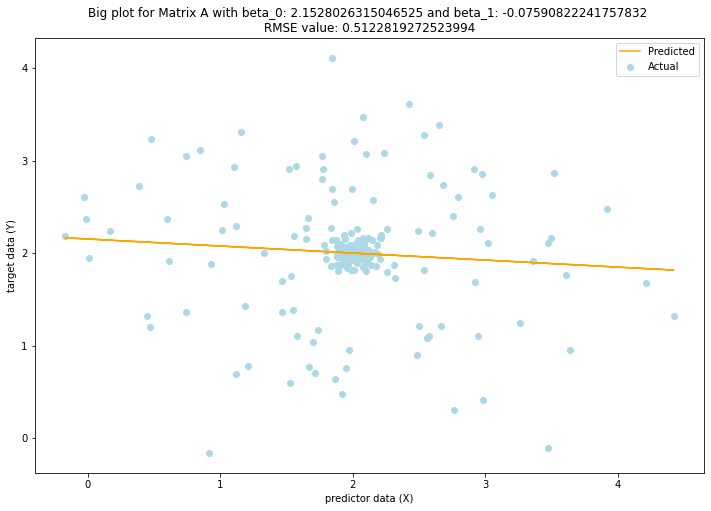

In [28]:
#Overall plot
plt.figure(figsize=(12,8))
plt.title(f"Big plot for Matrix A with beta_0: {b_0} and beta_1: {b_1} \nRMSE value: {rmse(y_pred,y )}")
plt.plot(X, y_pred,label='Predicted',c='orange')
plt.scatter(X,y,label='Actual',c='lightblue')
plt.xlabel("predictor data (X)")
plt.ylabel("target data (Y)")
plt.legend()
plt.show()



---
**REPORT**


* We generated 3 data samples, and concatenate all of them in one Matrix called A.
* We implemented the two algorithms asked from us.
* We trained using the first algorithm to find beta values.
* We used the beta values from previous stage into our prediction function to provide predictions.
* We checked the first 10 observations and predictions.
* We additionally wrote the RMSE function to check on the accuracy of our model.
* and at last we plotted the data.

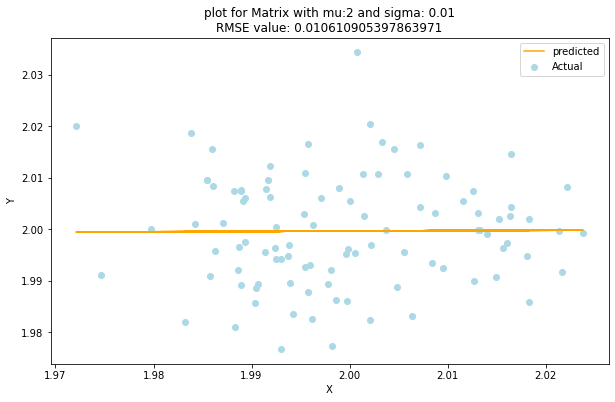

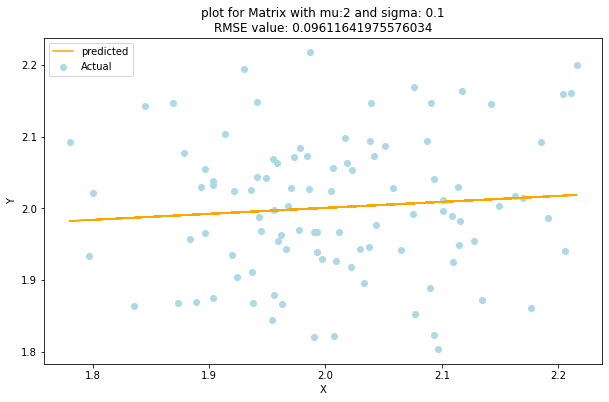

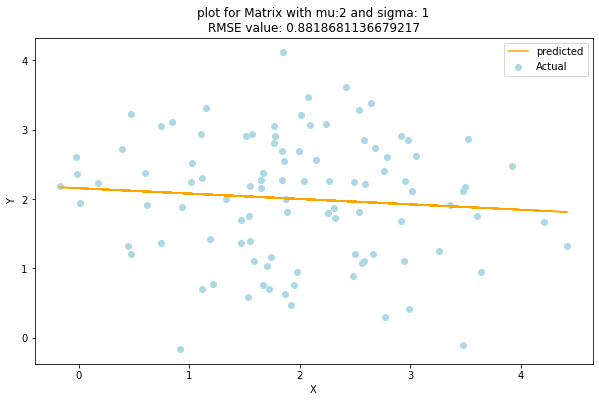

In [29]:
#this counter goes through each sigma
counter = 0
for i in [A_1,A_2,A_3]:
  #matrix plot
  x = i[:,0]
  y = i[:,1]
  b_0, b_1 = learn_simple_linreg_algo(x, y)
  y_pred = predict_simple_linreg(x, b_0, b_1)
  plt.figure(figsize=(10,6))
  plt.title(f"plot for Matrix with mu:{mui} and sigma: {sigma[counter]}\nRMSE value: {rmse(y_pred,y)}")
  plt.plot(x, y_pred,c='orange', label="predicted")
  plt.scatter(x,y,label='Actual',c='lightblue')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()
  counter += 1



---
**REPORT**


*   when the sigma value is smaller, the x points are closer to each other and when it is bigger they go further from each other and the predicted y is around 2.
*   looking at the rmse in different matrices we see that the lower sigma leads to a better linear model and better predictions.



**Beta_0 = 0**

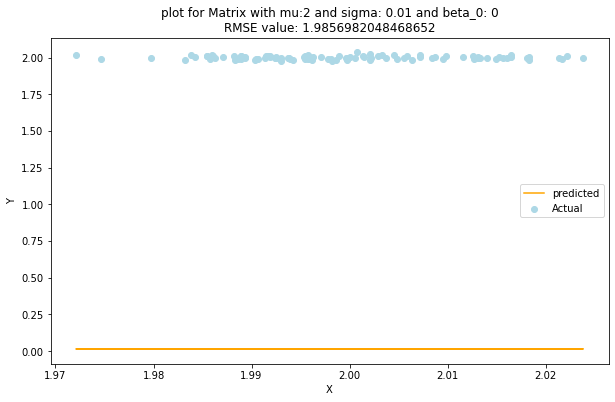

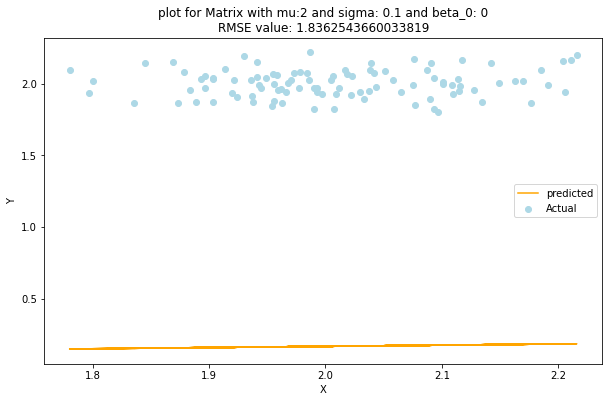

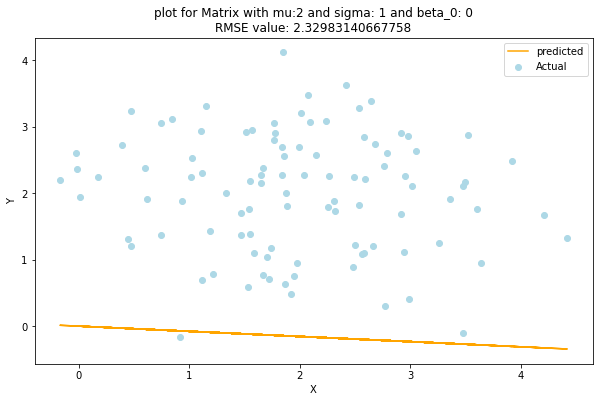

In [30]:
#this counter goes through each sigma
counter = 0
#going through each data sample
for i in [A_1,A_2,A_3]:
  #matrix plot
  x = i[:,0]
  y = i[:,1]
  b_0, b_1 = learn_simple_linreg_algo(x, y)
  y_pred = predict_simple_linreg(x, 0, b_1)
  plt.figure(figsize=(10,6))
  plt.title(f"plot for Matrix with mu:{mui} and sigma: {sigma[counter]} and beta_0: 0\nRMSE value: {rmse(y_pred,y)}")
  plt.plot(x, y_pred,c='orange', label="predicted")
  plt.scatter(x,y,label='Actual',c='lightblue')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()
  counter += 1 



---


**REPORT**

When beta_0=0

* the smaller the sigma the more concentrated values are and the predicted line is further.
* the rmse is better when mu=0.1

**beta_1= 0**

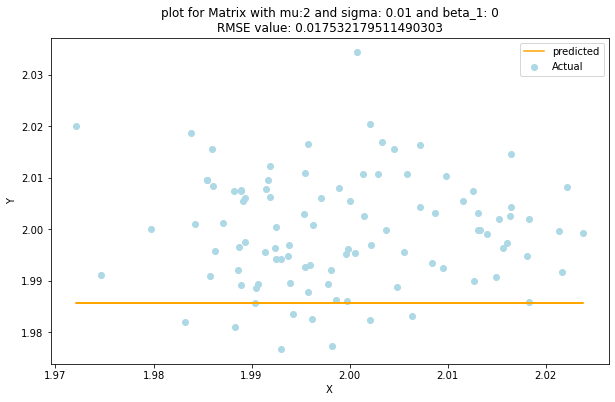

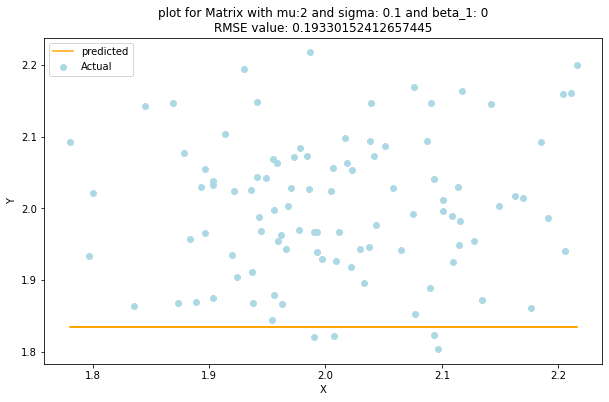

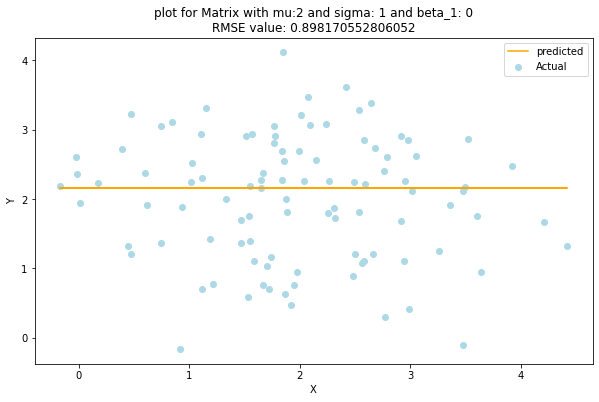

In [31]:
#this counter goes through each sigma
counter = 0
#going through each data sample
for i in [A_1,A_2,A_3]:
  #matrix plot
  x = i[:,0]
  y = i[:,1]
  b_0, b_1 = learn_simple_linreg_algo(x, y)
  y_pred = predict_simple_linreg(x, b_0, 0)
  plt.figure(figsize=(10,6))
  plt.title(f"plot for Matrix with mu:{mui} and sigma: {sigma[counter]} and beta_1: 0\nRMSE value: {rmse(y_pred,y)}")
  plt.plot(x, y_pred,c='orange', label="predicted")
  plt.scatter(x,y,label='Actual',c='lightblue')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()
  counter += 1 



---

**REPORT**

*   Overall The rmse has a better score when the beta_1 is zero.
*   Overall the rmse is better when the sigma value is smaller.



using: 
**np.linalg.lstsq**

y = mx + c


y = Ap, where A = [[x 1]] and p = [[m]

In [32]:
# making matrix A
A = np.vstack([A_1[:,0], np.ones(100)]).T

In [33]:
#computing m and c values which are the same as our beta vlues computed before.
m, c = np.linalg.lstsq(A, A_1[:,1], rcond=None)[0]

In [34]:
m,c

(0.006980412346192261, 1.985669854084183)

In [35]:
print("using np.linalg.lstsq:")
for i in [A_1,A_2,A_3]:
  A = np.vstack([i[:,0], np.ones(100)]).T
  b_1, b_0 = np.linalg.lstsq(A, i[:,1], rcond=None)[0]
  print(f"beta values are {b_0, b_1}")
  y_pred = predict_simple_linreg(i[:,0], b_0, b_1)
  rmse_value = rmse(y_pred, i[:,1])
  print("RMSE value is:",rmse_value)
  

using np.linalg.lstsq:
beta values are (1.985669854084183, 0.006980412346192261)
RMSE value is: 0.01061090539786397
beta values are (1.8337370941658484, 0.0833820369477365)
RMSE value is: 0.09611641975576035
beta values are (2.156483946992654, -0.07754003395814123)
RMSE value is: 0.8818681136679217


In [36]:
print("using simple linear regression algorithm")
for i in [A_1,A_2,A_3]:
  b_0, b_1 = learn_simple_linreg_algo(x = i[:,0], y=  i[:,1])
  print(f"beta values are {b_0, b_1}")
  y_pred = predict_simple_linreg(i[:,0], b_0, b_1)
  rmse_value = rmse(y_pred, i[:,1])
  print("RMSE value is:",rmse_value)

using simple linear regression algorithm
beta values are (1.9856698540841824, 0.006980412346192671)
RMSE value is: 0.010610905397863971
beta values are (1.8337370941658497, 0.08338203694773534)
RMSE value is: 0.09611641975576034
beta values are (2.156483946992653, -0.07754003395814146)
RMSE value is: 0.8818681136679217




---

**REPORT**


Both approaches lead to the same beta values


---



---



---



*to convert to pdf from colab*

In [42]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('DDA_Ex01_Nabawi309498.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.



W: GPG error: https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
E: The repository 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease' is no longer signed.
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DDA_Ex01_Nabawi309498.ipynb to pdf
[NbConvertApp] Support files will be in DDA_Ex01_Nabawi309498_files/
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi309498_files
[NbConvertApp] Making directory ./DDA_Ex01_Nabawi30949

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'